#  Geocoding in Geopandas

One of the libraries that can do the geocoding for us is geopy that makes it easy to locate the coordinates of addresses, cities, countries, and landmarks across the globe using third-party geocoders and other data sources. Geopy uses third-party geocoders - i.e. services that does the geocoding - to locate the addresses and it works with multiple different service providers

There are also other Python modules in addition to geopy that can do geocoding such as Geocoder.

It is possible to do geocoding in Geopandas using its integrated functionalities of geopy. Geopandas has a function called geocode() that can geocode a list of addresses (strings) and return a GeoDataFrame containing the resulting point objects in geometry column. 

In [2]:
# Import necessary modules
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# Filepath
fp = r"addresses.txt"

# Read the data
data = pd.read_csv(fp, sep=';')

# Let's take a look of the data
data.head()

,id,addr
0,1000,"Itämerenkatu 14, 00101 Helsinki, Finland"
1,1001,"Kampinkuja 1, 00100 Helsinki, Finland"
2,1002,"Kaivokatu 8, 00101 Helsinki, Finland"
3,1003,"Hermannin rantatie 1, 00580 Helsinki, Finland"
4,1005,"Tyynenmerenkatu 9, 00220 Helsinki, Finland"


In [2]:
""" BUGS IN GEOCODE MODULE 

# Import the geocoding tool
from geopandas.tools import geocode

# Geocode addresses with Nominatim backend
geo = geocode(data['addr'], provider='nominatim')

geo.head(2)

"""

" BUGS IN GEOCODE MODULE \n\n# Import the geocoding tool\nfrom geopandas.tools import geocode\n\n# Geocode addresses with Nominatim backend\ngeo = geocode(data['addr'], provider='nominatim')\n\ngeo.head(2)\n\n"

In [3]:
#ALTERNATIVE: GEOCODER PACKAGE
import geocoder
#Get lat and lon based on adresses using OSM as provider
geo_latlng = [geocoder.osm(adress).latlng for adress in data["addr"]]
#Convert to Point geometry
geo_point = [Point(addr[1], addr[0]) for addr in geo_latlng]

#Add points to new column "geometry" in GeoDataFrame
geo = gpd.GeoDataFrame(data)
geo["geometry"] = geo_point
geo.head()

,id,addr,geometry
0,1000,"Itämerenkatu 14, 00101 Helsinki, Finland",POINT (24.9155624 60.1632015)
1,1001,"Kampinkuja 1, 00100 Helsinki, Finland",POINT (24.9316914 60.1690222)
2,1002,"Kaivokatu 8, 00101 Helsinki, Finland",POINT (24.94244049213 60.16988445)
3,1003,"Hermannin rantatie 1, 00580 Helsinki, Finland",POINT (24.9654618 60.2009041)
4,1005,"Tyynenmerenkatu 9, 00220 Helsinki, Finland",POINT (24.9216003 60.1566475)


In [4]:
# Output file path
outfp = r"Addr\\addresses.shp"

# Save to Shapefile
geo.to_file(outfp)

# Retrieving OpenStreetMap data

OpenStreetMap (OSM) is a global collaborative (crowd-sourced) dataset and project that aims at creating a free editable map of the world containing a lot of information about our environment. It contains data for example about streets, buildings, different services, and landuse to mention a few.

The Python module called osmnx can be used to retrieve, construct, analyze, and visualize street networks from OpenStreetMap. In short it offers really handy functions to download data from OpenStreet map, analyze the properties of the OSM street networks, and conduct network routing based on walking, cycling or driving.

In [95]:
import osmnx as ox
import matplotlib.pyplot as plt

#Let’s retrieve OpenStreetMap (OSM) data by specifying 
#"Kamppi, Helsinki, Finland" as the address where the 
#data should be downloaded.
#place_name = "Marollen, Brussels, Belgium"
place_name = "2018, Vlaanderen, België"

graph = ox.graph_from_place(place_name)

type(graph)

networkx.classes.multidigraph.MultiDiGraph

What we can see here is that this data type belongs to a Python module called networkx that can be used to create, manipulate, and study the structure, dynamics, and functions of complex networks. Networkx module contains algorithms that can be used to calculate shortest paths along networks using e.g. Dijkstra’s or A* algorithm.

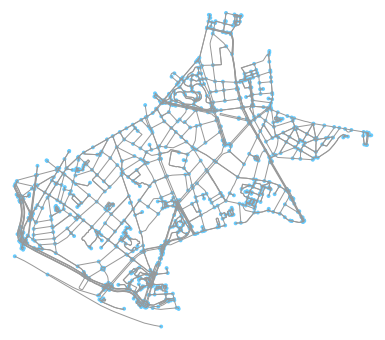

<Figure size 432x288 with 0 Axes>

In [96]:
#Let’s see how our street network looks like. It is easy 
#to visualize the graph with osmnx with plot_graph() function. 
fig, ax = ox.plot_graph(graph)

plt.tight_layout()


In [97]:
#Let’s download the buildings with buildings_from_place() function
#and plot them on top of our street network. Let’s also 
#plot the Polygon that represents the area
area = ox.gdf_from_place(place_name)

buildings = ox.buildings_from_place(place_name)

print(type(area))
print(type(buildings))

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geodataframe.GeoDataFrame'>


In [98]:
#Let’s extract the nodes and edges from the graph as GeoDataFrames.
nodes, edges = ox.graph_to_gdfs(graph)
print(nodes.head())
print(edges.head())

           highway       osmid  ref        x        y  \
821293065      NaN   821293065  NaN  4.40652  51.1959   
27283465       NaN    27283465  NaN  4.41253  51.2093   
26193946       NaN    26193946  NaN  4.41649  51.1995   
3222278175     NaN  3222278175  NaN  4.39128   51.201   
475754529      NaN   475754529  NaN  4.42116  51.2124   

                                geometry  
821293065   POINT (4.4065205 51.1959359)  
27283465    POINT (4.4125297 51.2093291)  
26193946    POINT (4.4164891 51.1994702)  
3222278175  POINT (4.3912769 51.2009704)  
475754529   POINT (4.4211576 51.2123711)  
  access area bridge                                           geometry  \
0    NaN  NaN    NaN  LINESTRING (4.4065205 51.1959359, 4.4064041 51...   
1    NaN  NaN    NaN  LINESTRING (4.4065205 51.1959359, 4.4067125 51...   
2    NaN  NaN    NaN  LINESTRING (4.4065205 51.1959359, 4.4062295 51...   
3    NaN  NaN    NaN  LINESTRING (4.4125297 51.2093291, 4.4117236 51...   
4    NaN  NaN    NaN  LI

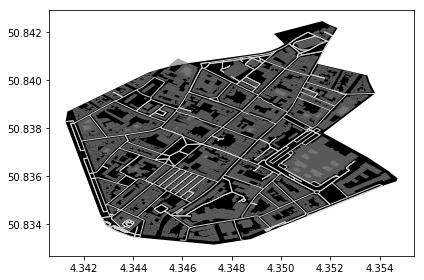

In [76]:
#Let’s create a map out of the streets, buildings, and the 
#area Polygon but let’s exclude the nodes (to keep the figure clearer).
fig, ax = plt.subplots()

area.plot(ax=ax, facecolor='black')
edges.plot(ax=ax, linewidth=1, edgecolor='lightgrey')
buildings.plot(ax=ax, facecolor='grey', alpha=0.7)
plt.tight_layout()

Column highway in our edges GeoDataFrame contains information about the type of the street (such as primacy, cycleway or footway). Select the streets that are walkable or that can be used with cycle and visualize only them with the buildings and the area polygon. Use different colors and line widths for the cycleways and footways.

In [145]:
l = ["path", "pedestrian", "footway", "cycleway"]
edges_ped = edges[
    (edges["highway"] == "path")|
    (edges["highway"] == "pedestrian")|
    (edges["highway"] == "footway")
]
edges_cyc = edges[edges["highway"] == "cycleway"]
edges_ped.head()

,access,area,bridge,geometry,highway,junction,key,lanes,length,maxspeed,name,oneway,osmid,ref,service,tunnel,u,v,width
0,NaN,NaN,NaN,"LINESTRING (4.4065205 51.1959359, 4.4064041 51...",path,NaN,0,NaN,46.430,NaN,NaN,False,68154492,NaN,NaN,NaN,821293065,821293279,NaN
1,NaN,NaN,NaN,"LINESTRING (4.4065205 51.1959359, 4.4067125 51...",path,NaN,0,NaN,45.309,NaN,NaN,False,68154492,NaN,NaN,NaN,821293065,821293146,NaN
2,NaN,NaN,NaN,"LINESTRING (4.4065205 51.1959359, 4.4062295 51...",path,NaN,0,NaN,71.309,NaN,NaN,False,68154499,NaN,NaN,NaN,821293065,821293219,NaN
57,NaN,NaN,NaN,"LINESTRING (4.4230001 51.213202, 4.42267 51.21...",pedestrian,NaN,0,NaN,24.173,NaN,Lange Kievitstraat,False,25388297,NaN,NaN,NaN,50065487,1174298460,NaN
63,NaN,NaN,NaN,"LINESTRING (4.4122148 51.2003343, 4.4122877 51...",path,NaN,0,NaN,80.984,NaN,NaN,False,117235256,NaN,NaN,NaN,1320534101,1320534269,NaN


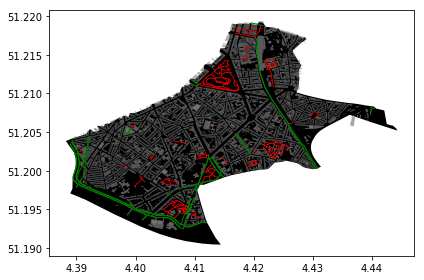

In [150]:
fig, ax = plt.subplots()

area.plot(ax=ax, facecolor='black')
edges_ped.plot(ax=ax, linewidth=0.5, edgecolor='red')
edges_cyc.plot(ax=ax, linewidth=1, edgecolor='green')
buildings.plot(ax=ax, facecolor='grey', alpha=0.7)
plt.tight_layout()